# Modelling And Evaluation

## Objectives

*   Answer buisness requirement 2
    *   The clients objective is to accurately determine the status and if they are healthy or infected with powdery mildew."

## Inputs

*   inputs/cherry_dataset/cherry-leaves/test
*   inputs/cherry_dataset/cherry-leaves/validation
*   inputs/cherry_dataset/cherry-leaves/train
*   image shape embeddings

## Outputs

*   Plot the distribution of images across the training, validation, and test sets.
*   Implement image augmentation techniques.
*   Adjust class indices to align prediction inferences with labels.
*   Develop and train the machine learning model.
*   Save the trained model.
*   Generate a learning curve plot to evaluate model performance.
*   Evaluate the model using a pickle file.
*   Perform predictions on a random image file.

### Additional Comments | Insights | Conclusions

## Import Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread

## Set Working Directory

In [2]:
cwd = os.getcwd()

In [3]:
os.chdir('/workspace/cherry')
print("You set a new current directory!")

You set a new current directory!


In [4]:
work_dir = os.getcwd()
work_dir

'/workspace/cherry'

## Set Input Directory

Set train, validation and test paths

In [5]:
my_data_dir = 'inputs/cherry_dataset/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## Set OutPut Directory

In [6]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
  print('Old version is already available create a new version.')
  pass
else:
  os.makedirs(name=file_path)

Old version is already available create a new version.


## Set Labels

In [7]:
labels = os.listdir(train_path)

print(
    f"Project Labels: {labels}"
    )

Project Labels: ['healthy', 'powdery_mildew']


## Set Image Shape

In [10]:
## Import saved image shape embedding
import joblib
version = 'v1'
image_shape = joblib.load(filename=f"outputs/{version}/image_shape.pkl")
image_shape

(45, 45, 3)

## Number Of Images In Train/Test And Validation Data

* train - healthy: 1472 images
* train - powdery_mildew: 1472 images
* validation - healthy: 210 images
* validation - powdery_mildew: 210 images
* test - healthy: 422 images
* test - powdery_mildew: 422 images


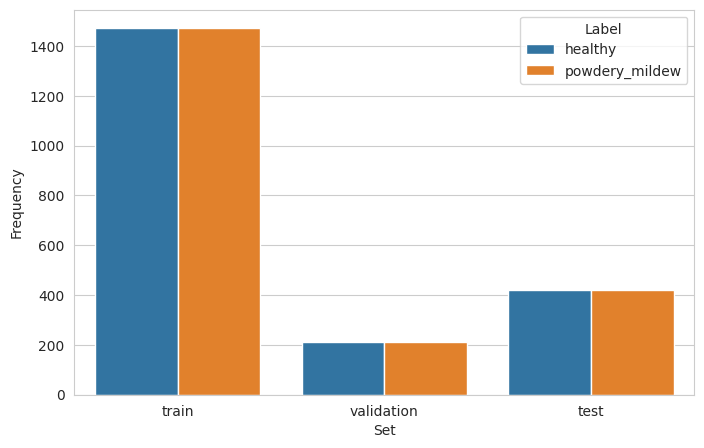

In [13]:

df_list = []

# Iterate over each dataset folder and label to compute image frequencies
for folder in ['train', 'validation', 'test']:
    for label in labels:
        frequency = len(os.listdir(f"{my_data_dir}/{folder}/{label}"))
        df_list.append(pd.Series(data={'Set': folder, 'Label': label, 'Frequency': frequency}))
        print(f"* {folder} - {label}: {frequency} images")

# Concatenate all Series into a DataFrame
df_freq = pd.concat(df_list, axis=1).T.reset_index(drop=True)

# Plotting the image distribution
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.savefig(f"{file_path}/labels_distribution.png", bbox_inches='tight', dpi=150)
plt.show()



## Image Data Augmentation

### ImageDataGenerator

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2025-01-27 07:56:03.796234: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## *Initialize ImageDataGenerator

In [27]:
augmented_image_data = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.10, 
    height_shift_range=0.10,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest',
    rescale=1./255
)

##  * Augment Training Image Dataset

In [28]:
# Define batch size
batch_size = 20

# Generate augmented image data
train_set = augmented_image_data.flow_from_directory(
    train_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True
)

# Display class indices
print(train_set.class_indices)


Found 2944 images belonging to 2 classes.
{'healthy': 0, 'powdery_mildew': 1}


##  * Augment Validation Image Dataset

In [29]:
# Generate validation image data with rescaling
validation_set = ImageDataGenerator(rescale=1./255).flow_from_directory(
    val_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Display class indices
print(validation_set.class_indices)


Found 420 images belonging to 2 classes.
{'healthy': 0, 'powdery_mildew': 1}


##  * Augment Test Image Dataset

In [30]:
# Generate test image data with rescaling
test_set = ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_path,
    target_size=image_shape[:2],
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Display class indices
print(test_set.class_indices)


Found 844 images belonging to 2 classes.
{'healthy': 0, 'powdery_mildew': 1}


## Plot Augmented Training Image

(20, 45, 45, 3)


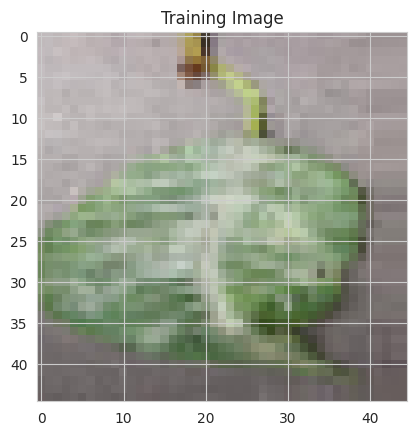

(20, 45, 45, 3)


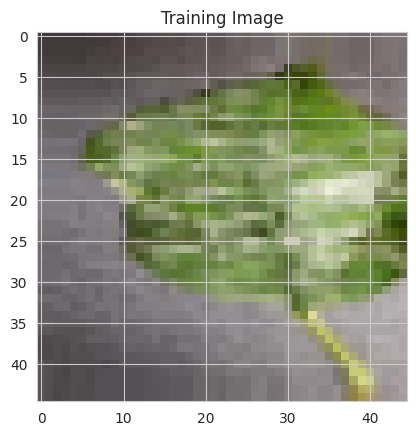

(20, 45, 45, 3)


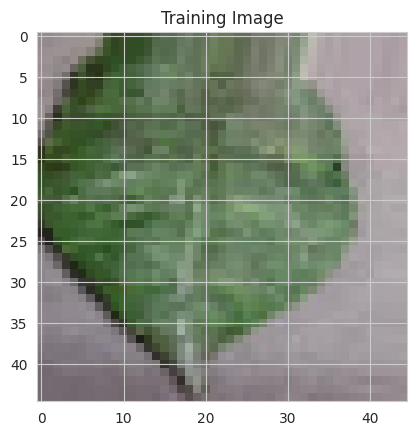

In [33]:
# Plotting augmented training images
for _ in range(3):
    img, label = next(train_set)
    print(img.shape)   # (1, 256, 256, 3)
    plt.imshow(img[0])
    plt.title("Training Image")
    plt.show()



##  *Plot Augmented Validation And Test Images

(20, 45, 45, 3)


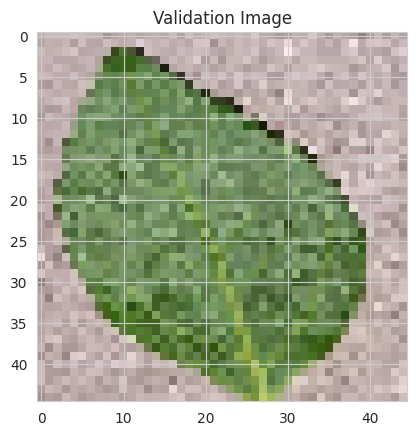

(20, 45, 45, 3)


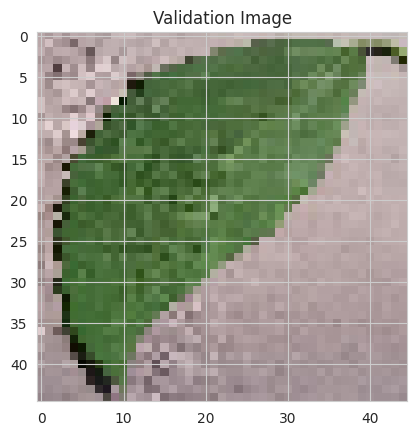

(20, 45, 45, 3)


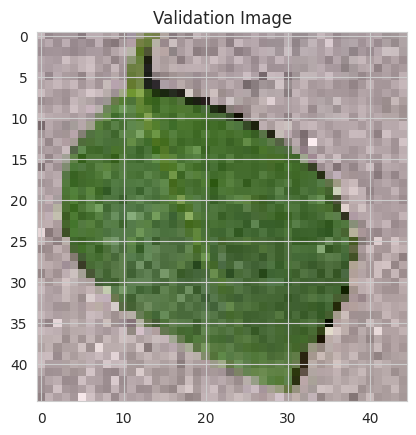

In [35]:
# Plotting augmented validation images
for _ in range(3):
    img, label = next(validation_set)
    print(img.shape)   # (1, 256, 256, 3)
    plt.imshow(img[0])
    plt.title("Validation Image")
    plt.show()



(20, 45, 45, 3)


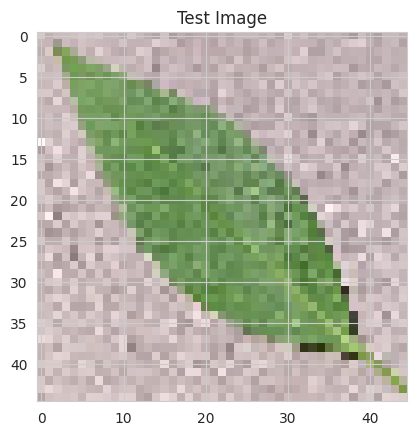

(20, 45, 45, 3)


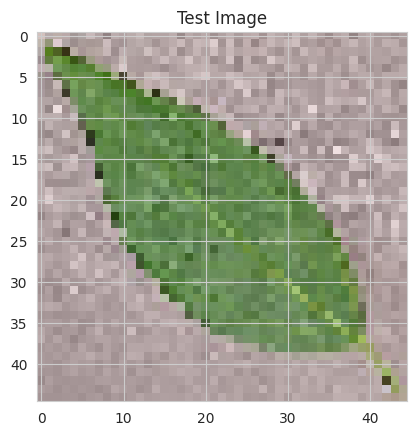

(20, 45, 45, 3)


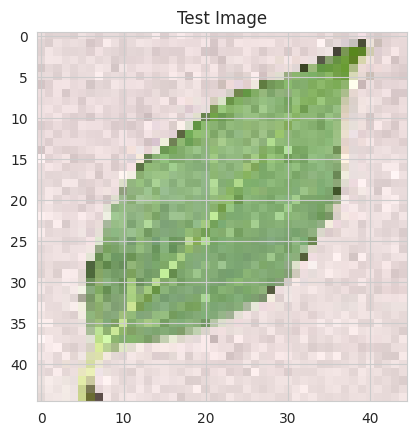

In [36]:
# Plotting augmented test images
for _ in range(3):
    img, label = next(test_set)
    print(img.shape)   # (1, 256, 256, 3)
    plt.imshow(img[0])
    plt.title("Test Image")
    plt.show()
